source: https://www.capology.com/uk/premier-league/salaries/

In [197]:
import pandas as pd
pd.set_option('display.max_columns', 200) # default is 20
pd.set_option('display.float_format', '{:,}'.format) # include , in thousand figures

## Read in and examine

In [198]:
file = '/Users/aidanadmin/Documents/DATA/ALL_DATASETS/football_salaries_2023_OUTPUT_clean.csv'

df = pd.read_csv(file)

In [199]:
df.shape

(565, 13)

In [200]:
# top 3 rows

df.head()

,name,club,status,position,position_detail,age,country,active,loan,signed,expiration,years,annual_gross_gbp
0,Kevin De Bruyne,Manchester City,Starter,F,AM,32,Belgium,True,False,"Apr 7, 2021","Jun 30, 2025",2,"20,800,000.0"
1,Erling Haaland,Manchester City,Starter,F,CF,23,Norway,True,False,"Jul 1, 2022","Jun 30, 2027",4,"19,500,000.0"
2,Mohamed Salah,Liverpool,Starter,F,RW,31,Egypt,True,False,"Jul 1, 2022","Jun 30, 2025",2,"18,200,000.0"
3,Casemiro,Manchester United,Starter,M,DM,31,Brazil,True,False,"Aug 22, 2022","Jun 30, 2026",3,"18,200,000.0"
4,Raphaël Varane,Manchester United,Starter,D,CB,30,France,True,False,"Aug 14, 2021","Jun 30, 2025",2,"17,680,000.0"


In [185]:
# how many rows are NaN?

len(df[df.isna().any(axis=1)])

19

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              565 non-null    object 
 1   club              565 non-null    object 
 2   status            565 non-null    object 
 3   position          565 non-null    object 
 4   position_detail   565 non-null    object 
 5   age               565 non-null    int64  
 6   country           565 non-null    object 
 7   active            565 non-null    bool   
 8   loan              565 non-null    bool   
 9   signed            565 non-null    object 
 10  expiration        565 non-null    object 
 11  years             565 non-null    int64  
 12  annual_gross_gbp  546 non-null    float64
dtypes: bool(2), float64(1), int64(2), object(8)
memory usage: 49.8+ KB


In [187]:
# double filter

df[(df.club == 'Liverpool') & (df.age == 36)]

,name,club,status,position,position_detail,age,country,active,loan,signed,expiration,years,annual_gross_gbp
194,Adrián,Liverpool,Reserve,K,GK,36,Spain,True,False,"Jun 30, 2023","Jun 30, 2024",1,3120000.0


In [216]:
# sort by values in annual_gross_gbp column

df[df.club == 'Liverpool'].sort_values('annual_gross_gbp', ascending = False).head(4)

,name,club,status,position,position_detail,age,country,active,loan,signed,expiration,years,annual_gross_gbp
2,Mohamed Salah,Liverpool,Starter,F,RW,31,Egypt,True,False,"Jul 1, 2022","Jun 30, 2025",2,"18,200,000.0"
20,Virgil van Dijk,Liverpool,Starter,D,CB,32,Netherlands,True,False,"Aug 13, 2021","Jun 30, 2025",2,"11,440,000.0"
25,Thiago,Liverpool,Reserve,M,CM,32,Spain,True,False,"Sep 18, 2020","Jun 30, 2024",1,"10,400,000.0"
37,Trent Alexander-Arnold,Liverpool,Starter,D,RB,24,England,True,False,"Jul 30, 2021","Jun 30, 2025",2,"9,360,000.0"


In [31]:
# what are the clubs and how many times does each appear in the dataset?

df.club.value_counts()

club
Nottingham Forest    36
Burnley              33
Manchester United    32
Chelsea              32
Tottenham            31
Sheffield United     30
Newcastle            30
Brighton             28
Brentford            28
Bournemouth          28
Wolverhampton        27
Aston Villa          27
Crystal Palace       27
Luton Town           26
Manchester City      26
Fulham               26
Arsenal              26
West Ham             25
Everton              24
Liverpool            23
Name: count, dtype: int64

In [19]:
# top 10 most frequently occuring countries?

df.country.value_counts()[:10]

country
England        175
Brazil          34
France          30
Portugal        22
Netherlands     21
Spain           21
Belgium         18
Ireland         16
Wales           15
Argentina       15
Name: count, dtype: int64

In [191]:
# average age of players

print(df.age.mean())
print(df.age.median())
print(df.age.mode())

25.819469026548674
25.0
0    26
Name: age, dtype: int64


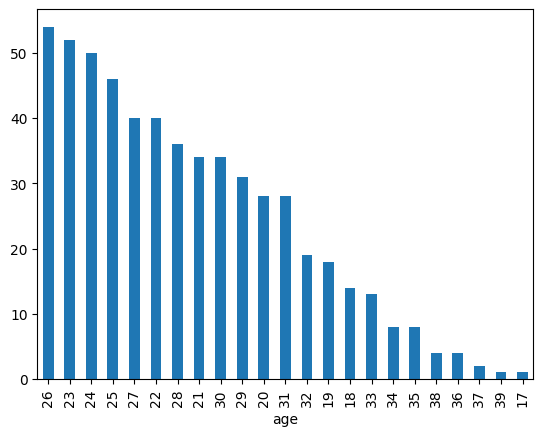

In [192]:
# ages: most frequently occuring

df.age.value_counts().plot(kind = 'bar');

## Groupby

In [218]:
# groupby club, then get salary average, round off the figure, show 30 biggest

df.groupby('club', sort=False).annual_gross_gbp.mean().round().nlargest(30)

club
Manchester City     8,361,167.0
Arsenal             6,641,440.0
Manchester United   6,462,375.0
Liverpool           5,923,478.0
Chelsea             5,356,000.0
Aston Villa         4,500,000.0
Tottenham           3,891,034.0
West Ham            3,760,640.0
Everton             3,269,083.0
Newcastle           2,913,793.0
Fulham              2,509,000.0
Crystal Palace      2,441,852.0
Brighton            2,243,704.0
Nottingham Forest   2,088,529.0
Wolverhampton       1,906,667.0
Bournemouth         1,884,071.0
Brentford           1,417,000.0
Burnley             1,155,030.0
Sheffield United      958,533.0
Luton Town            945,000.0
Name: annual_gross_gbp, dtype: float64

In [219]:
# same but total the salaries by club

df.groupby('club', sort = False).annual_gross_gbp.sum().nlargest(30)

club
Manchester United   206,796,000.0
Manchester City     200,668,000.0
Arsenal             166,036,000.0
Chelsea             155,324,000.0
Liverpool           136,240,000.0
Aston Villa         117,000,000.0
Tottenham           112,840,000.0
West Ham             94,016,000.0
Newcastle            84,500,000.0
Everton              78,458,000.0
Nottingham Forest    71,010,000.0
Crystal Palace       65,930,000.0
Brighton             60,580,000.0
Bournemouth          52,754,000.0
Wolverhampton        51,480,000.0
Fulham               50,180,000.0
Brentford            39,676,000.0
Burnley              38,116,000.0
Sheffield United     28,756,000.0
Luton Town           24,570,000.0
Name: annual_gross_gbp, dtype: float64

In [232]:
# find which nationality makes most money, per average player

df.groupby('country')['annual_gross_gbp'].mean().round().nlargest(30)

country
Egypt            10,530,000.0
Croatia           9,186,667.0
Norway            7,259,200.0
South Korea       5,720,000.0
France            5,361,379.0
Ecuador           5,200,000.0
Mexico            5,200,000.0
Brazil            4,597,938.0
Portugal          4,555,714.0
Argentina         4,382,857.0
Spain             4,359,789.0
Switzerland       4,333,333.0
New Zealand       4,160,000.0
Belgium           3,961,750.0
Hungary           3,900,000.0
Netherlands       3,807,143.0
Sweden            3,714,286.0
Cameroon          3,607,500.0
Germany           3,525,600.0
Ukraine           3,515,200.0
Uruguay           3,445,000.0
Ghana             3,342,857.0
Japan             3,206,667.0
England           3,149,575.0
Israel            3,120,000.0
Mali              3,120,000.0
Italy             3,042,000.0
Poland            2,769,000.0
Jamaica           2,704,000.0
Czech Republic    2,600,000.0
Name: annual_gross_gbp, dtype: float64